### Import data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
df = pd.read_excel('HW4.xlsx')

### EDA

In [ ]:
df.shape

(2000, 25)

In [ ]:
df.head(5)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [ ]:
df.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [ ]:
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


In [ ]:
# reverse dummy variables back
df1 = df.copy()
df1['source'] = df1.filter(like='source_').idxmax(axis=1)
df1['source'] = df1['source'].str.replace('source_', '')
df1.loc[df1.filter(like='source_').sum(axis=1) == 0, 'source'] = 'unknown'
df1.drop(df1.filter(like='source_').columns, axis=1, inplace=True)
cols = df1.columns

In [ ]:
print(df1.shape)
print(cols)
df1.head(5)

(2000, 11)
Index(['sequence_number', 'US', 'Freq', 'last_update_days_ago',
       '1st_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res',
       'Purchase', 'Spending', 'source'],
      dtype='object')


,sequence_number,US,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,source
0,1,1,2,3662,3662,1,0,1,1,127.87,b
1,2,1,0,2900,2900,1,1,0,0,0.00,e
2,3,1,2,3883,3914,0,0,0,1,127.48,t
3,4,1,1,829,829,0,1,0,0,0.00,c
4,5,1,1,869,869,0,0,0,0,0.00,c


In [ ]:
df1.describe()

,sequence_number,US,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


In [ ]:
x_col_c = ['US', 'Web order', 'Gender=male', 'Address_is_res', 'source'] #categorical columns
x_col_n = ['Freq', 'last_update_days_ago', '1st_update_days_ago'] #numerical columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Value counts for US:
US
1    1649
0     351
Name: count, dtype: int64


Value counts for Web order:
Web order
0    1148
1     852
Name: count, dtype: int64


Value counts for Gender=male:
Gender=male
1    1049
0     951
Name: count, dtype: int64


Value counts for Address_is_res:
Address_is_res
0    1558
1     442
Name: count, dtype: int64


Value counts for source:
source
e          302
w          275
a          253
u          238
r          137
b          120
c          112
h          105
s           94
unknown     90
d           83
o           67
t           43
x           36
m           33
p           12
Name: count, dtype: int64




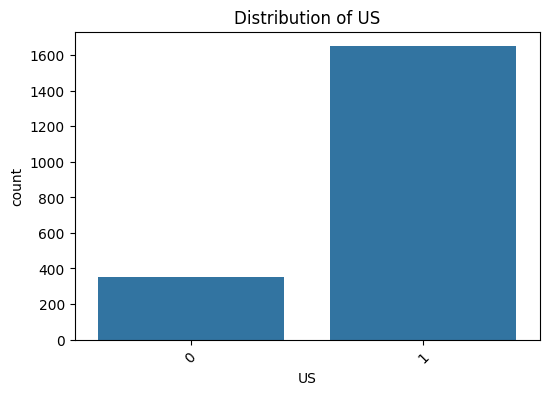

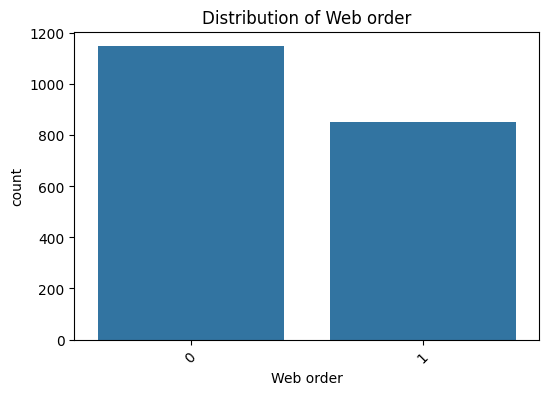

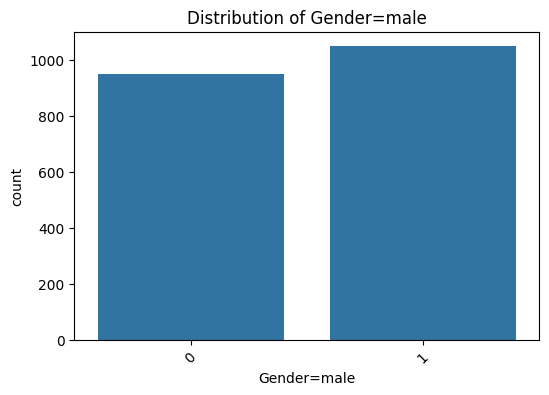

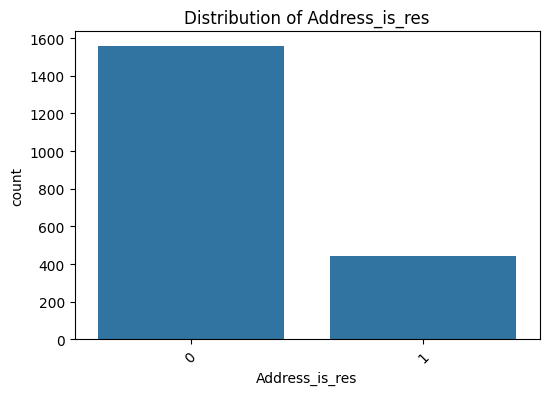

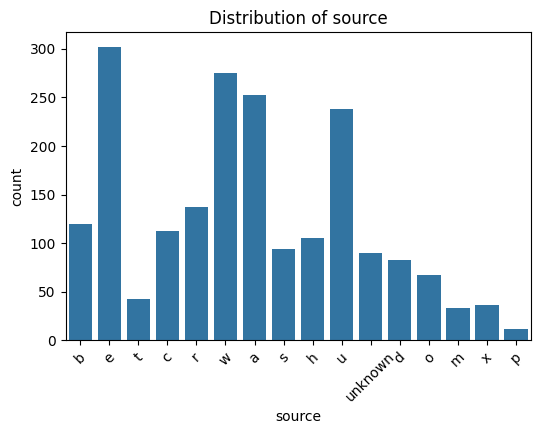

In [ ]:
# bar plot for categorical features
for col in x_col_c:
    print(f"Value counts for {col}:")
    print(df1[col].value_counts())
    print("\n")
for col in x_col_c:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df1, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

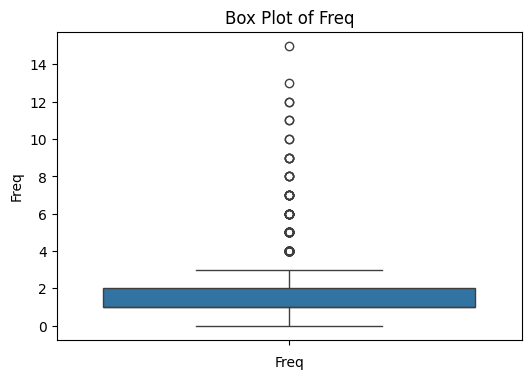

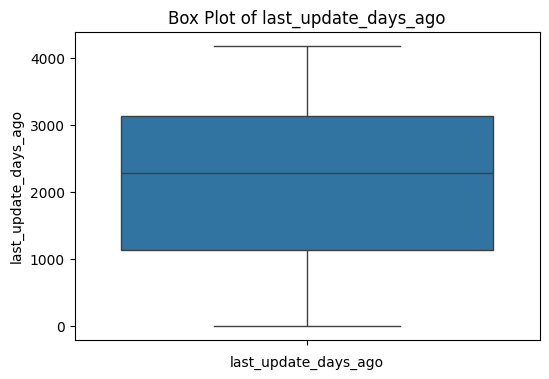

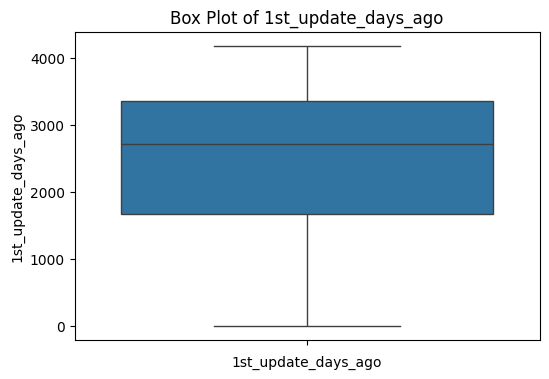

In [ ]:
# box plot for numerical features
for col in x_col_n:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df1, y=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

Purchase
1    1000
0    1000
Name: count, dtype: int64


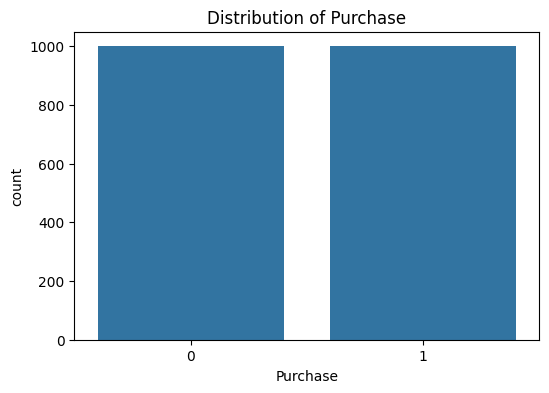

In [ ]:
# bar plot for categorical target variable
print(df['Purchase'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='Purchase')
plt.title('Distribution of Purchase')
plt.show()

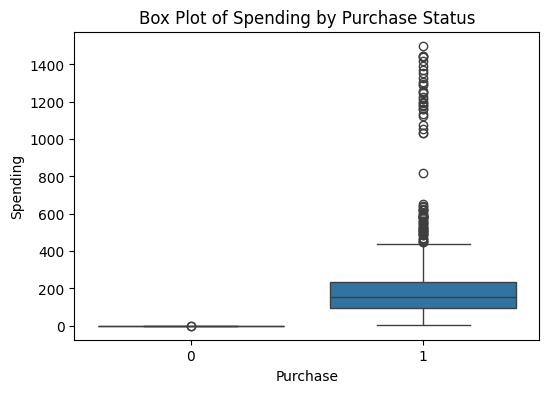

In [ ]:
# box plot for numerical target variable
plt.figure(figsize=(6, 4))
sns.boxplot(data=df1, x='Purchase', y='Spending')
plt.title('Box Plot of Spending by Purchase Status')
plt.xlabel('Purchase')
plt.ylabel('Spending')
plt.show()

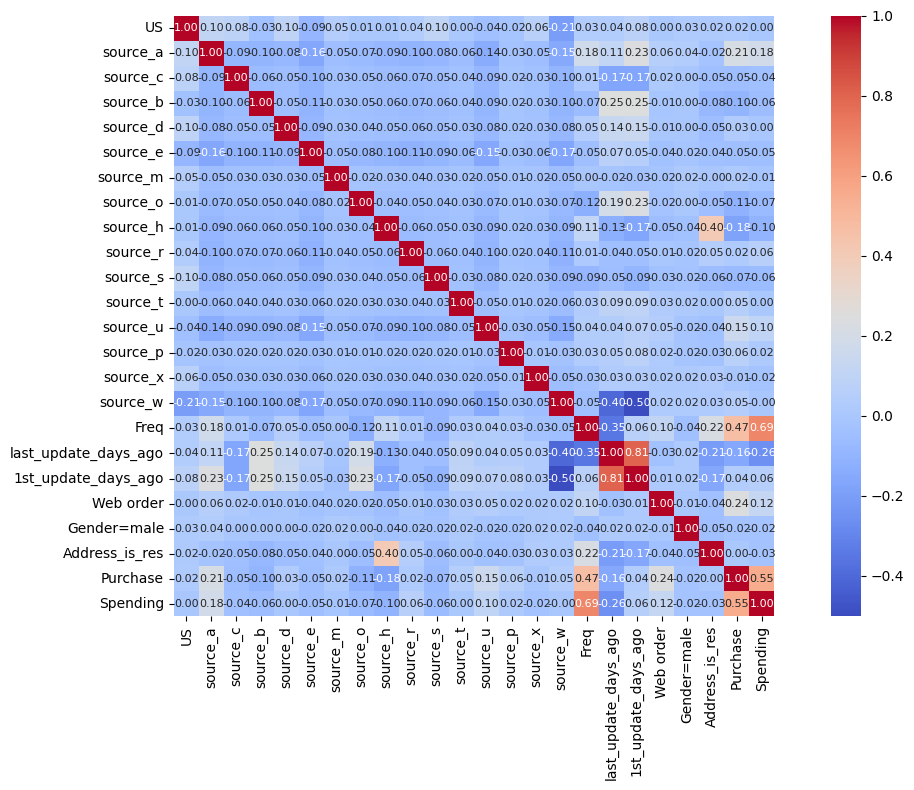

In [ ]:
# correlation heatmap
cols = [ 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending']

cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(12, 8))
hm = sns.heatmap(cm,
                 cbar=True,         # whether to draw a colorbar
                 annot=True,        # if True, write the data value in each cell
                 square=True,       # if True, set the Axes aspect to “equal” so each cell will be square-shaped
                 cmap = 'coolwarm',
                 fmt='.02f',         # string formatting code to use when adding annotations
                 annot_kws={'size': 8}, # keyword arguments for ax.text when annot is True (size of font)
                 yticklabels=cols,  # if True, plot the column names of the dataframe.
                 xticklabels=cols)
plt.tight_layout()
plt.show()

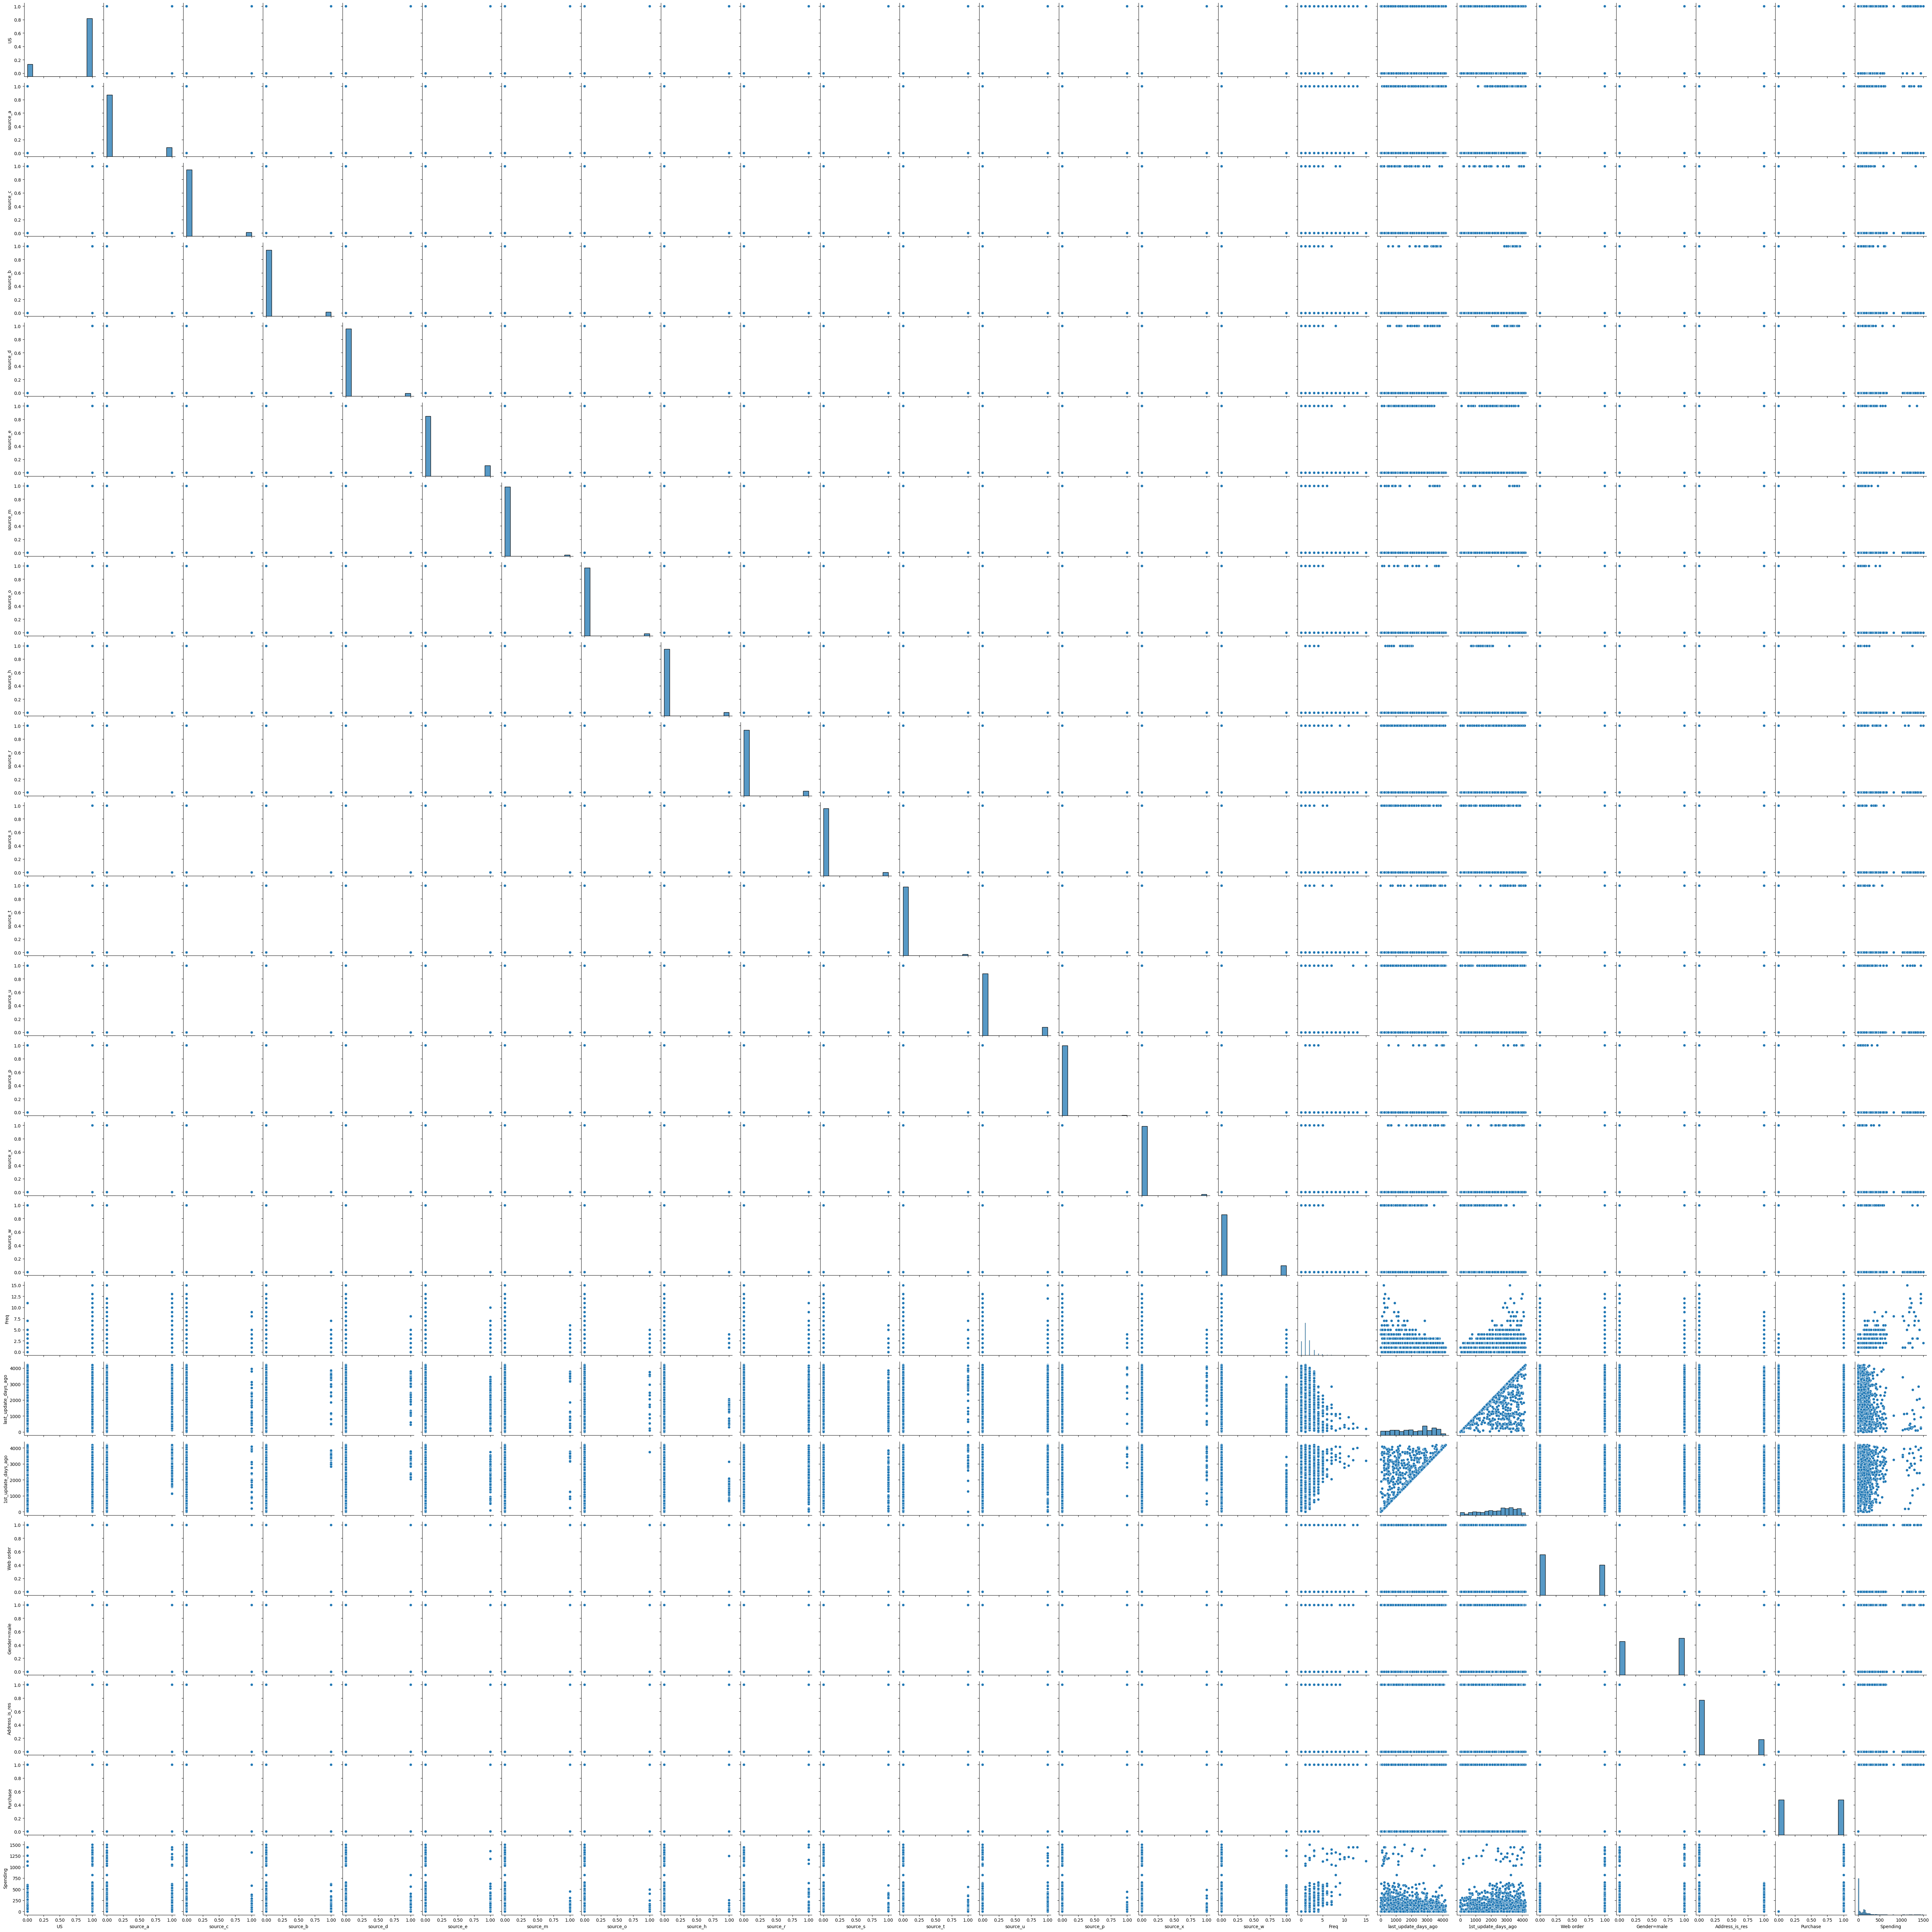

In [ ]:
# plot pairwise relationships in a dataset
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

## Question 1

### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
mse_scorer = make_scorer(mean_squared_error)

In [ ]:
# Splitting the data into features and target
x_col = ['US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res']
X = df[x_col]
y = df['Spending']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Cross-validation
lin_reg_cv_scores = cross_val_score(lin_reg, X, y, cv=10, scoring = mse_scorer)
print(f'Linear Regression CV Scores: {lin_reg_cv_scores}')
print(f'Linear Regression Mean CV Score: {lin_reg_cv_scores.mean()}')

Linear Regression CV Scores: [15776.97598278 36610.51182381 18070.4997402  13433.49904117
 16214.75133893 12385.24730869 10079.33073518  9175.56952756
 15312.04945036 16812.74624833]
Linear Regression Mean CV Score: 16387.118119699917


### knn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (optional if you're using cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the k-NN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=10, scoring=mse_scorer)
print(f'k-NN CV Scores: {knn_cv_scores}')
print(f'k-NN Mean CV Score: {knn_cv_scores.mean()}')

k-NN CV Scores: [24752.60687312 55091.33494608 34659.27856496 26881.51676664
 40985.83521414 24765.07653492 20732.29552174 10374.941597
 26619.36455518 24629.53581524]
k-NN Mean CV Score: 28949.178638902005


### regression tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Building the regression tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Cross-validation
tree_cv_scores = cross_val_score(tree_reg, X, y, cv=10, scoring = mse_scorer)
print(f'Regression Tree CV Scores: {tree_cv_scores}')
print(f'Regression Tree Mean CV Score: {tree_cv_scores.mean()}')

Regression Tree CV Scores: [24800.03865618 47678.21536962 33249.91430306 16334.09088113
 23166.41915081 33433.7905355  27105.97205131 14400.11801939
 49686.45733512 31719.5800405 ]
Regression Tree Mean CV Score: 30157.459634261108


### discussion

In [ ]:
print(f'Linear Regression Mean CV Score: {lin_reg_cv_scores.mean()}')
print(f'k-NN Mean CV Score: {knn_cv_scores.mean()}')
print(f'Regression Tree Mean CV Score: {tree_cv_scores.mean()}')

Linear Regression Mean CV Score: 16387.118119699917
k-NN Mean CV Score: 28949.178638902005
Regression Tree Mean CV Score: 30157.459634261108


The linear regression model has the smallest MSE (Mean Squared Error), so it performs best (the difference between predicted value and actual value is the smallest.)

## Question 2

### feature engineering

In [ ]:
df['time_since_first_update'] =  df['1st_update_days_ago'] - df['last_update_days_ago']

#create a feature frequency: the average time gap between two visit
df['frequency'] = df['time_since_first_update']/df['Freq']
df['frequency'] = df['frequency'].fillna(0)
df['frequency'] = df['frequency'].replace([np.inf, -np.inf], 0)

X_col = ['US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'time_since_first_update']

Skewness of Freq: 2.98
Skewness of last_update_days_ago: -0.19
Skewness of 1st_update_days_ago: -0.49
Skewness of time_since_first_update: 2.84
Skewness of frequency: 5.04
Skewness of Spending: 3.93


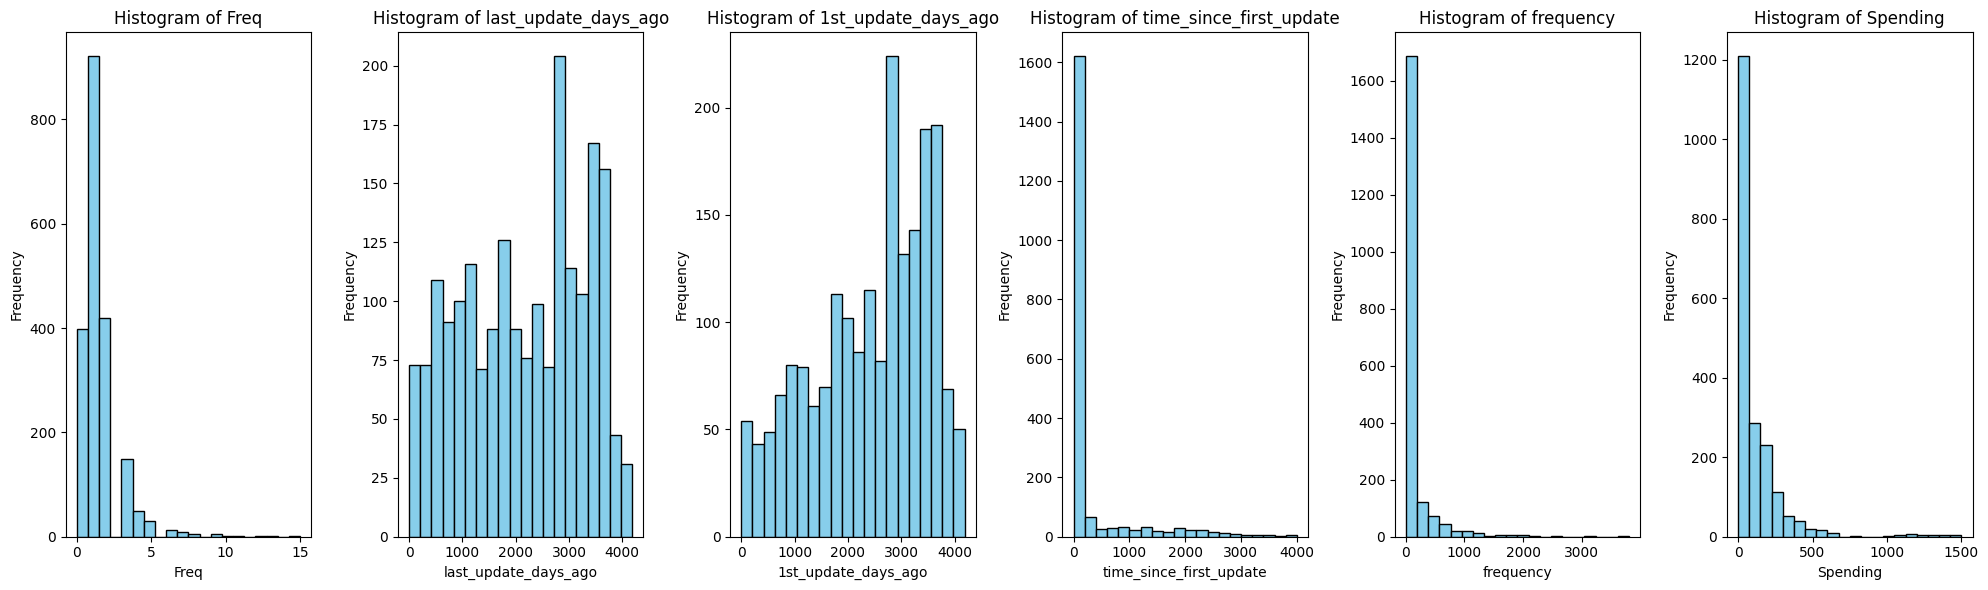

In [ ]:
from scipy.stats import skew
# Numerical columns
col_n = ['Freq', 'last_update_days_ago', '1st_update_days_ago', 'time_since_first_update', 'frequency', 'Spending']

# Create the figure for histograms
plt.figure(figsize=(20, 6))

# Loop through each column, calculate skewness, and plot histogram
for i, col in enumerate(col_n, 1):
    plt.subplot(1, 6, i)

    # Plot the histogram
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Calculate and print skewness
    skewness = skew(df[col].dropna())  # dropna() to avoid NaN values
    print(f'Skewness of {col}: {skewness:.2f}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
# We noticed that freq, time_since_first_update, Spending (not for target variable) are right-skewed, do log_transformation
df['log_Freq'] = np.log1p(df['Freq'])  # log(1 + Freq)
df['log_time_since_first_update'] = np.log1p(df['time_since_first_update'])
df['log_Spending'] = np.log1p(df['Spending'])
df['log_frequency'] = np.log1p(df['frequency'])

# last_update_days_ago and 1st_update_days_ago are left-skewed, do square transformation
df['square_1st_update_days_ago'] = df['1st_update_days_ago']**2
df['square_last_update_days_ago'] = df['last_update_days_ago']**2


### Linear Regression

In [ ]:
# Splitting the data into features and target
x_col = ['US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Web order',
       'Freq', 'last_update_days_ago', '1st_update_days_ago','log_Freq', 'log_time_since_first_update',
       'Gender=male', 'Address_is_res', 'frequency', 'log_frequency', 'square_last_update_days_ago', 'square_1st_update_days_ago']
X = df[x_col]
y = df['Spending']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Cross-validation
lin_reg_cv_scores = cross_val_score(lin_reg, X, y, cv=10, scoring = mse_scorer)
print(f'Linear Regression CV Scores: {lin_reg_cv_scores}')
print(f'Linear Regression Mean CV Score: {lin_reg_cv_scores.mean()}')

Linear Regression CV Scores: [15794.2348755  36410.85786957 17541.73295784 13890.71666168
 14760.54683582 11383.90465354  9147.00518001  8513.34168761
 15992.98331224 15876.60902395]
Linear Regression Mean CV Score: 15931.193305776647


### knn

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (optional if you're using cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the k-NN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=10, scoring=mse_scorer)
print(f'k-NN CV Scores: {knn_cv_scores}')
print(f'k-NN Mean CV Score: {knn_cv_scores.mean()}')

k-NN CV Scores: [25606.49475396 53935.12513544 27917.9907582  22088.72778062
 40902.85909708 23965.3995077  19708.9168934  10710.172447
 22545.92871402 26931.7793009 ]
k-NN Mean CV Score: 27431.339438831998


### regression tree

In [ ]:
# Building the regression tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Cross-validation
tree_cv_scores = cross_val_score(tree_reg, X, y, cv=10, scoring = mse_scorer)
print(f'Regression Tree CV Scores: {tree_cv_scores}')
print(f'Regression Tree Mean CV Score: {tree_cv_scores.mean()}')

Regression Tree CV Scores: [22849.69059681 50989.89372653 24192.61924056 16291.36212862
 23704.09523368 37371.5531575  28537.19192368 20087.05821489
 32399.60453863 25552.181044  ]
Regression Tree Mean CV Score: 28197.52498048924


### discussion

In [ ]:
print(f'Linear Regression Mean CV Score: {lin_reg_cv_scores.mean()}')
print(f'k-NN Mean CV Score: {knn_cv_scores.mean()}')
print(f'Regression Tree Mean CV Score: {tree_cv_scores.mean()}')

Linear Regression Mean CV Score: 15931.193305776647
k-NN Mean CV Score: 27431.339438831998
Regression Tree Mean CV Score: 28197.52498048924


The linear regression model still has the smallest MSE (Mean Squared Error), so it performs best (the difference between predicted value and actual value is the smallest.)

Noticing a positively correlation of the 1st_update_days_ago and last_update_daus_ago, time_since_first_update is calculated and created to substitute the two features.
An attribute named frequency by dividing time_since_first_update by Freq is calculated to describe the time gap between two visit.
The performance of the three model increased (MSE decreased, ie. the error between prediction and actual vaule decreased). This is caused by the log transformation of the right-skewed variables and the square transformation of left-skewed variables.

## Question 3

### Linear Regression

In [ ]:
# 2 parameters: regularization method (Ridge, Lasso), alpha

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to tune hyperparameters
ridge_cv = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for Ridge Regression:", ridge_cv.best_params_)
print("Best Score (MSE):", -ridge_cv.best_score_)

Best Parameters for Ridge Regression: {'alpha': 10}
Best Score (MSE): 16002.830499079058


In [ ]:
# Initialize the Lasso Regression model
lasso = Lasso()

# Define hyperparameter grid (alpha is the regularization strength)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to tune hyperparameters
lasso_cv = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for Lasso Regression:", lasso_cv.best_params_)
print("Best Score (MSE):", -lasso_cv.best_score_)

Best Parameters for Lasso Regression: {'alpha': 1}
Best Score (MSE): 15981.706889012208


### knn

In [ ]:
# parameters: n_neighbors, weights(uniform/distance), p(1 for Manhattan, 2 for Euclidean)

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Use GridSearchCV to tune hyperparameters
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
knn_cv.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for k-NN:", knn_cv.best_params_)
print("Best Score (MSE):", -knn_cv.best_score_)


Best Parameters for k-NN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score (MSE): 18740.15134429167


### regression tree

In [ ]:
# parameters: max_depth, min_samples_split, min_samples_leaf

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to tune hyperparameters
tree_cv = GridSearchCV(tree_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
tree_cv.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for Decision Tree:", tree_cv.best_params_)
print("Best Score (MSE):", -tree_cv.best_score_)

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score (MSE): 18386.09530505033


### discussion

In [ ]:
# Compare Lasso results
print(f"Lasso Regression Best MSE: {-lasso_cv.best_score_}")
print(f"Ridge Regression Best MSE: {-ridge_cv.best_score_}")
print(f"k-NN Best MSE: {-knn_cv.best_score_}")
print(f"Decision Tree Best MSE: {-tree_cv.best_score_}")


Lasso Regression Best MSE: 15981.706889012208
Ridge Regression Best MSE: 16002.830499079058
k-NN Best MSE: 18740.15134429167
Decision Tree Best MSE: 18386.09530505033


Linear Regression Model: Lasso, alpha = 0.1.

KNN Model: 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'.

Decision Tree Model: 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10.